# GridSearchCV for the Vectorizer

In this notebook, we perform a grid search in order to discover the best parameters for the Vectorizer.

In [163]:
%run notebook_utils.py
%run gridsearch_utils.py

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [19]:
# set big font in plots
SMALL_SIZE = 16
matplotlib.rc('font', size=SMALL_SIZE)
matplotlib.rc('axes', titlesize=SMALL_SIZE)

In [1]:
%cd ..
from langid import WrappedVectorizer, sanitize, np_sanitize
%cd - 

/Users/Lin/git/SwigSpot/language-detection
/Users/Lin/git/SwigSpot/language-detection/notebooks


### data loading

In [4]:
X, y = load_data()

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0)
X_train = np.array(X_train)
y_train = np.array(y_train)

In [173]:
sms_any_X, sms_any_y = load_sms_any()
X_valid, y_valid = load_validation_data()

# GridSearch for the vectorizer


In [7]:
pipe = Pipeline([
    ('vect', WrappedVectorizer(analyzer='char')),
    ('clf', LogisticRegression())
])

gs_params = {
    'vect__sg_only': (True, False),
    'vect__sanitizer': (None, np_sanitize),
    'vect__max_features': (4000, 6000, 10000),
    'vect__ngram_range': ((3,3), (4,4), (3,5)), 
    'vect__use_idf': (True, False),
    'vect__sublinear_tf': (True, False),
}

gs = GridSearchCV(pipe, gs_params, n_jobs=-1, verbose=1)

print("fitting...")
gs.fit(X, y)

fitting...
Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed: 41.5min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('vect', WrappedVectorizer(sg_only=False, sanitizer=None, analyzer='char', binary=False, decode_error='strict', dtype=<class 'numpy.int64'>, encoding='utf-8', input='content', lowercase=True, max_df=1.0, max_features=None, min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'vect__sg_only': (True, False), 'vect__sanitizer': (None, <numpy.lib.function_base.vectorize object at 0x115206710>), 'vect__max_features': (4000, 6000, 10000), 'vect__ngram_range': ((3, 3), (4, 4), (3, 5)), 'vect__use_idf': (True, False), 'vect__sublinear_tf': (True, False)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [132]:
print_best_estimator(gs)
print("\n---------\n")
print_scores_csv(gs)


Best score: 0.991
Best parameters set:
	vect__max_features: 10000
	vect__ngram_range: (3, 3)
	vect__sanitizer: None
	vect__sg_only: False
	vect__sublinear_tf: True
	vect__use_idf: True

---------

mean, std, vect__max_features,vect__ngram_range,vect__sanitizer,vect__sg_only,vect__sublinear_tf,vect__use_idf
0.987, 0.006, 4000, (3, 3), None, True, True, True
0.986, 0.005, 4000, (3, 3), None, True, True, False
0.987, 0.006, 4000, (3, 3), None, True, False, True
0.985, 0.004, 4000, (3, 3), None, True, False, False
0.989, 0.005, 4000, (3, 3), None, False, True, True
0.986, 0.005, 4000, (3, 3), None, False, True, False
0.989, 0.005, 4000, (3, 3), None, False, False, True
0.986, 0.004, 4000, (3, 3), None, False, False, False
0.985, 0.006, 4000, (3, 3), <numpy.lib.function_base.vectorize object at 0x115206710>, True, True, True
0.984, 0.004, 4000, (3, 3), <numpy.lib.function_base.vectorize object at 0x115206710>, True, True, False
0.985, 0.006, 4000, (3, 3), <numpy.lib.function_base.vectorize

## Evaluating the best estimator found

In [14]:
gs.best_estimator_.named_steps['vect'].get_params()

{'analyzer': 'char',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 10000,
 'min_df': 1,
 'ngram_range': (3, 3),
 'norm': 'l2',
 'preprocessor': None,
 'sanitizer': None,
 'sg_only': False,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': True,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [61]:
best_pipe = Pipeline(steps=[
    ('vec', WrappedVectorizer(**gs.best_estimator_.named_steps['vect'].get_params())),
    ('clf', LogisticRegression())
])

best_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vec', WrappedVectorizer(sg_only=False, sanitizer=None, analyzer='char', binary=False, decode_error='strict', dtype=<class 'numpy.int64'>, encoding='utf-8', input='content', lowercase=True, max_df=1.0, max_features=10000, min_df=1, ngram_range=(3, 3), norm='l2', preprocessor=None, smooth_idf...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

TEST SET
             precision    recall  f1-score   support

         de     0.9959    0.9911    0.9935      1462
         fr     0.9980    0.9986    0.9983      1468
         en     0.9974    0.9954    0.9964      1538
         it     0.9986    0.9960    0.9973      1482
         sg     0.9869    0.9958    0.9913      1438

avg / total     0.9954    0.9954    0.9954      7388



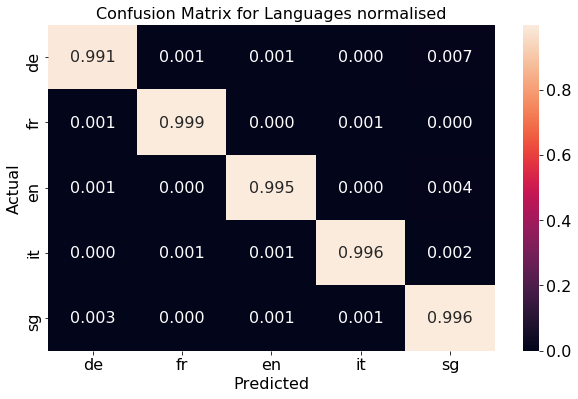

SMS RECALL
total samples    10692
total errors        54 (0.51%)
---------------------------------
languages detected
    de       50
    fr        1
    en        1
    it        2
    sg    10638


VALIDATION SET
             precision    recall  f1-score   support

         de     0.9478    0.9858    0.9664      2613
         fr     0.9992    0.9981    0.9987      2613
         en     0.9969    0.9950    0.9960      2613
         it     0.9977    0.9981    0.9979      2613
         sg     0.9793    0.9426    0.9606      2613

avg / total     0.9842    0.9839    0.9839     13065



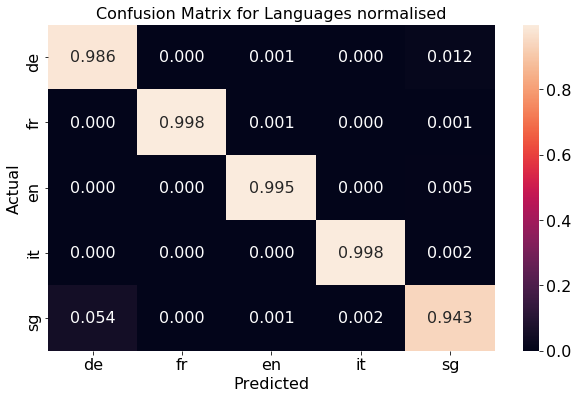

In [141]:
print("TEST SET")
print("========")
y_pred = best_pipe.predict(X_test)
print_results(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred, normalised=True)

print("SMS RECALL")
print("==========")

test_recall_with_sms(best_pipe)

print("\n\nVALIDATION SET")
print("===============")
y_valid_pred = best_pipe.predict(X_valid)
print_results(y_valid, y_valid_pred)
plot_confusion_matrix(y_valid, y_valid_pred, normalised=True)

In [164]:
print("Testing on SMS any")
print("==================\n")

sms_any_predicted = best_pipe.predict(sms_any_X)
print_results(sms_any_y, sms_any_predicted)
print()
print_errors_per_lang(sms_any_y, sms_any_predicted)
print_sample_errors(sms_any_X, sms_any_y, sms_any_predicted, limit=20)

Testing on SMS any

             precision    recall  f1-score   support

         de     1.0000    0.7512    0.8580       201
         fr     0.9946    0.9204    0.9561       201
         en     0.9930    0.7065    0.8256       201
         it     1.0000    0.9602    0.9797       201
         sg     0.6054    1.0000    0.7542       201

avg / total     0.9186    0.8677    0.8747      1005


Errors per language:

  de:   50
  fr:   16
  en:   59
  it:    8

Sample errors:

real|predicted  <sentence>
--------------------------
  fr|sg   Moi ossi! A tt a l h!
  en|sg   Hey you!how are you?!
  de|sg   Ja. Dr. Shepard..
  de|sg   Es regnet jedenfalls nicht, wir hoffen immer noch auf Sonne. Schönen Nachmittag!
  de|sg   schon aufm heimweg? Eta stäfa?
  de|sg   Kann ich anrufen?
  en|sg   Good night,my hero.
  de|sg   Gut, abgemacht. Bis morgen!
  de|sg   Au ja, gerne! Wann & wo wollen wir uns treffen? Ich könnt so ab 18.30 Uhr
  de|sg   Paßt gern ja.
  en|sg   I am busy right now. I'll call

# Understanding the errors better

In [170]:
errors_idx = np.argwhere(sms_any_y != sms_any_predicted).flatten()

In [171]:
print("English sentences taken for Swiss German:")
print("=========================================\n")
for i in errors_idx: 
    if sms_any_y[i] == 2:
        print(sms_any_X[i])

English sentences taken for Swiss German:

Babe...babe...i'm back again.i tell you i'm back again.i'm ba-hack again.babe...
Gd ngt my love, am so tired. Sleep well. kisss
Guess what? few min. late 8-|...sorry
Hi magi I rec ur message say hello to bengi Love mel.
Hope u r sleeping good! I go dreaming in u'r arms so deep, love u priska <3 xxx
Happy Birthday to you!
I am busy right now. I'll call you back later.tiziano
Hi celine. Monday 12.15 john
Should we go for a drink now?
Dont be shy never get drunk alone!!!!
I wane be loved by you,just you,nobody else bud you. I wana be kißed by you alone schuschubidu
Did u see it?
Very true... :-) u coming 2 pala 2nite?
I just kiss you betwern your legs :-) - CU soon...
Yessss! And I love it!!! :-)))
Tx big man, im in bed with flu ;-( will be in bdos in nov. Kiß magi & iwan
14. November! Love u:-*
Hey kiwi, u here soon?
Where R U?
S T A R T xxxxxxxxxxxxxxxxxxxx@yyy.ch
c u soon babes x's
How about lunch next week?B-)
Aiii äm wot ai ääm aiäm mai oon 

# Using probabilities

In [175]:
valid_proba = best_pipe.predict_proba(X_valid)
valid_bin = np.array(y_valid == 4, dtype=int)

In [178]:
print("Actual Swiss German: ", valid_bin.sum())
print("Predicted Swiss German using probability filter: ")
for proba in [0.5, 0.7, 0.8, 0.85, 0.9, 0.95]:
    print("  p >= %d: %d" % (proba * 100, np.array(valid_proba[:,4] >= proba, dtype=int).sum()))

Actual Swiss German:  2613
Predicted Swiss German using probability filter: 
  p >= 50: 2472
  p >= 70: 2340
  p >= 80: 2187
  p >= 85: 1974
  p >= 90: 1595
  p >= 95: 690


             precision    recall  f1-score   support

     Not SG     0.9607    0.9999    0.9799     10452
         SG     0.9995    0.8366    0.9108      2613

avg / total     0.9685    0.9672    0.9661     13065



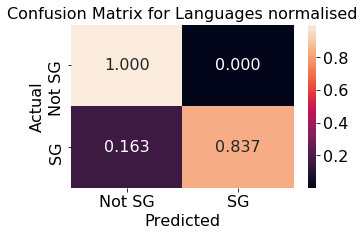

In [181]:
labels = ['Not SG', 'SG']
proba_pred = np.array(valid_proba[:,4] >= 0.8, dtype=int)
print_results(valid_bin, proba_pred, labels=labels)
plot_confusion_matrix(valid_bin, proba_pred, normalised=True, labels=labels, figsize=(5,3))

In [188]:
min_proba = 0.85
proba_pred = np.array(valid_proba[:,4] >= min_proba, dtype=int)
print("Sample of Swiss German sentences misclassified (min proba=%.2f):\n" % min_proba)
print("R|P  proba sentence")
print("-------------------")
err_idx = np.where(valid_bin != proba_pred)[0]
for i in random.sample(err_idx.tolist(), 20):
    print("%d|%d (%.2f) %s" % (valid_bin[i], proba_pred[i], valid_proba[i, 4], X_valid[i]))

Sample of Swiss German sentences misclassified (min proba=0.85):

R|P  proba sentence
-------------------
1|0 (0.57) I de andere Lager; Pfingstweekend, Herbstlager und Chlausweekend chömed denn au die andere Meutene dezue.
1|0 (0.45) Winterthur, «Die Schweiz als produktive Fiktion.
1|0 (0.81) S lager esch au scho ferbi :-(.wenn gets denn d fotis vom lager 2004?
1|0 (0.68) Die Tambouren der Schnoogekerzli mit dem Sujet Herr und Herr Fasnacht.
1|0 (0.17) Bedeutungsbildung in Text und Bild“ auf Schloss Nymphenburg, 18.3.
1|0 (0.85) Mir wüsse nid, was jetz do geit.
1|0 (0.06) Zürcher Ratshausvortrag, gehalten am 7. März 1918, in: Neue Zürcher Zeitung 393/398 (1918).
1|0 (0.64) Mir z Basel finde die Reegle doch seer kommod, hejoo, stäärbe d Zircher friener – sin si lenger dood!
1|0 (0.21) Freiburg i.Br: Arbeitskreis Regionalgeschichte Freiburg e. V. Freiburg i.Br., 2013.
1|0 (0.43) Cholgruebe / Cholgrueben (App. und Name) (Metzerlen-Mariastein SO) Eh.
1|0 (0.59) Facharzt FMH für Kardiologie

Average precision-recall score: 0.80


Text(0.5,1,'2-class Precision-Recall curve: AP=0.80')

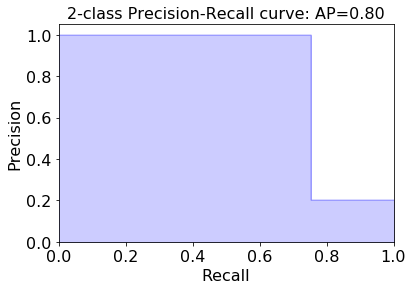

In [184]:
from sklearn.metrics import precision_recall_curve, average_precision_score
average_precision = average_precision_score(valid_bin, proba_pred)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))
precision, recall, _ = precision_recall_curve(valid_bin, proba_pred)

plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))